## Data Curation and ETL

### Load the Dataset

It is a data from https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

- RowNumber: corresponds to the record (row) number
- CustomerId: contains random values
- Surname: the surname of a customer
- CreditScore: customer's credit score
- Geography: a customer’s location
- Gender: customer's gender identity
- Age: customer's age
- Tenure: the number of years that the customer has been a client of the bank
- Balance: how much left in the customer's bank account
- NumOfProducts: the number of products that a customer has purchased through the bank
- HasCrCard: denotes whether or not a customer has a credit card
- IsActiveMember: if the customers active or not
- EstimatedSalary: customers' salary
- Exited: whether or not the customer left the bank.

In [2171]:
import pandas as pd

# Load the CSV file into a Pandas dataframe
churn_df = pd.read_csv('churn.csv')

# View the first 5 rows of the dataframe
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop the useless columns & drop the null entries

As mentioned above, we don't need RowNumber, CustomerId, Surname, Geography. Geography was excluded because there are only three European countries in the dataset, which means that it may not be a good indicator to generalize whether users will leave the bank.

In [2172]:
churn_df = churn_df[["CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]]
churn_df = churn_df.dropna()

churn_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


### Divide into features and label

We are examining if the user will churn or not, so the label should be "Excited" column because it's a indicator that shows if the user actually left the bank or not.

In [2173]:
churn_features_df = churn_df[["CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]]
churn_label_df = churn_df[["Exited"]]

In [2174]:
churn_features_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,Female,42,2,0.00,1,1,1,101348.88
1,608,Female,41,1,83807.86,1,0,1,112542.58
2,502,Female,42,8,159660.80,3,1,0,113931.57
3,699,Female,39,1,0.00,2,0,0,93826.63
4,850,Female,43,2,125510.82,1,1,1,79084.10


In [2175]:
churn_label_df.head()

,Exited
0,1
1,0
2,1
3,0
4,0


### Feature Transformation (1-hot encodings)

To include the gender column as a feature, we need to transform gender into a binary data because we cannot simply train the model with the string data.

In [2176]:
#We need to convert the 1-dimensional list into a list of lists(2D)

gender_to_list = churn_df["Gender"].to_list()

gender_to_list_of_lists = []

for gender in gender_to_list:
    gender_to_list_of_lists.append([gender])

1-hot encoding process

In [2177]:
from sklearn.preprocessing import OneHotEncoder

# now let's define an object
gender_encoder = OneHotEncoder()

# fit our data
gender_encoder.fit(gender_to_list_of_lists)

# Now transform each example in our data into 1-hot form
gender_transformed = gender_encoder.transform(gender_to_list_of_lists)

# Transform the result object into a matrix
gender_transformed = gender_transformed.toarray()

Add the one hot encoded data to the original data

In [2178]:
gender_transformed_df = pd.DataFrame(gender_transformed)

churn_features_df.reset_index(drop=True, inplace=True)
gender_transformed_df.reset_index(drop=True, inplace=True)

churn_features_transformed_df = pd.concat([churn_features_df,gender_transformed_df], axis=1)

churn_features_transformed_df = churn_features_transformed_df.drop(columns=["Gender"], axis=1)

churn_features_transformed_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,1.0,0.0


## Data visualization

Before we get into the model training, we wanted to explore the relationships between our features so that we can initially predict the result by our own. 

In [2179]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


Credit scores were similar to those who churned and those who didn't.

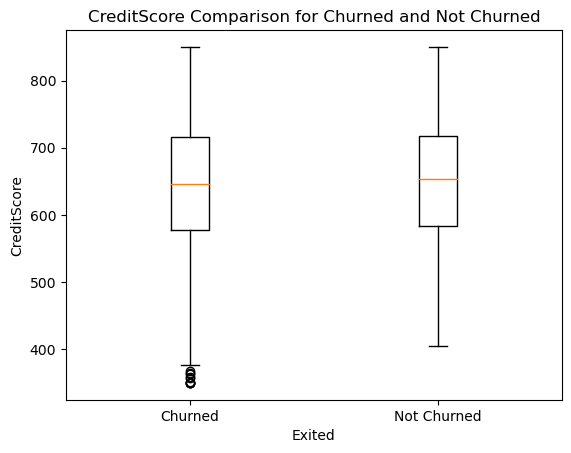

In [2180]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['CreditScore'], not_churned_df['CreditScore']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('CreditScore Comparison for Churned and Not Churned')
plt.ylabel('CreditScore')
plt.xlabel('Exited')

# Show the plot
plt.show()

This was quite a shock. We thought that the younger people would more likely to churn. However, the graph shows that older customers are more likely to churn. It may have been our stereotype that the older people get, the more they hate change. Since this result was the opposite of what we expected, we should focus more on this feature.

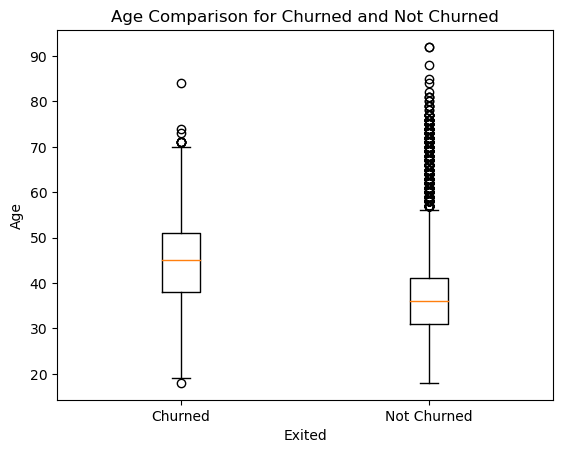

In [2181]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['Age'], not_churned_df['Age']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('Age Comparison for Churned and Not Churned')
plt.ylabel('Age')
plt.xlabel('Exited')

# Show the plot
plt.show()

Looking at tenure in both churned and not churned, the average is similar, but min and max show that the Churned category has both. This might just be a feature of the data sets we've collected, but we've tried to find meaning because we are in the data visualization stage. We do churn when we were the bank's client for too short a period of time, but we do churn when we were the clients for too long. A short period can be thought of as an intimacy with the company, and a long period is thought to be tired of the company or to try to find something new.

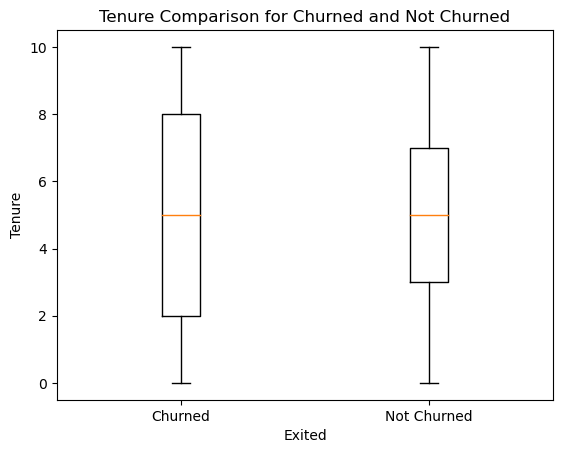

In [2182]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['Tenure'], not_churned_df['Tenure']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('Tenure Comparison for Churned and Not Churned')
plt.ylabel('Tenure')
plt.xlabel('Exited')

# Show the plot
plt.show()

This was a unqiue indicator as well. We expected people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. However, the plot shows that it's not. 

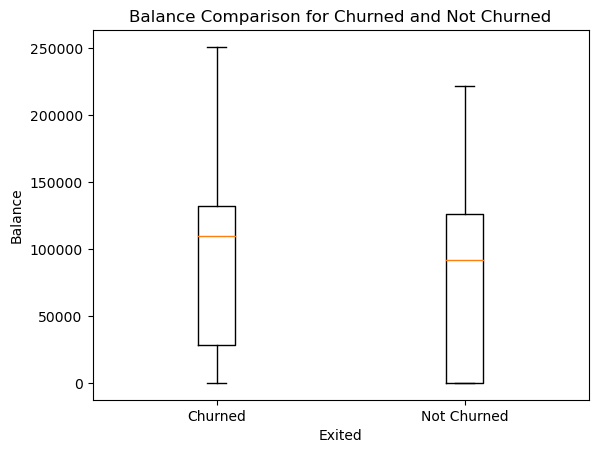

In [2183]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['Balance'], not_churned_df['Balance']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('Balance Comparison for Churned and Not Churned')
plt.ylabel('Balance')
plt.xlabel('Exited')

# Show the plot
plt.show()

Estimated salary were similar to those who churned and those who didn't.

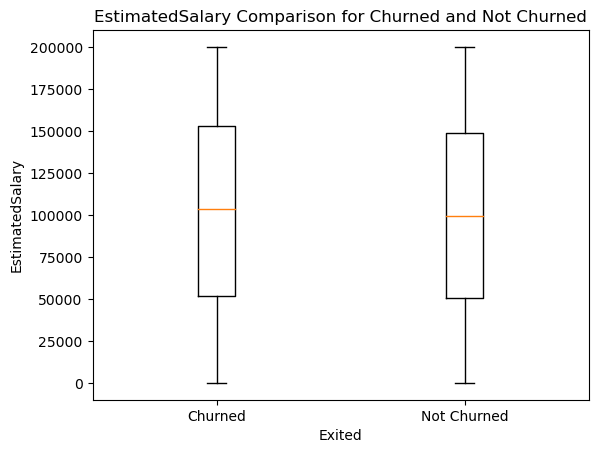

In [2184]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['EstimatedSalary'], not_churned_df['EstimatedSalary']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('EstimatedSalary Comparison for Churned and Not Churned')
plt.ylabel('EstimatedSalary')
plt.xlabel('Exited')

# Show the plot
plt.show()

It is obvious that the more products a customer purchased through a bank, the more likely it was to stay at the bank. And out expectation was nearly correct based on the graph.

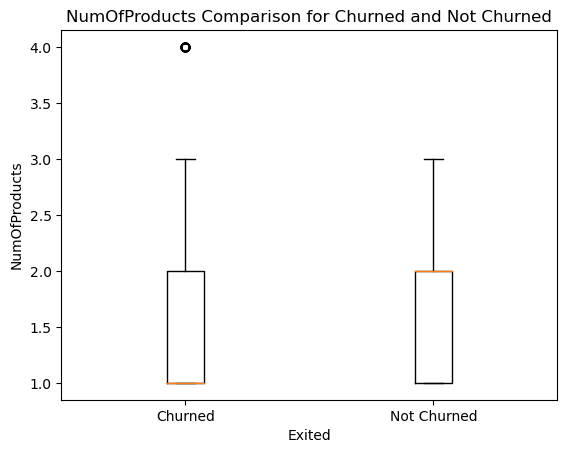

In [2185]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1) and did not churn (Exited = 0)
churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 1]
not_churned_df = churn_features_transformed_df[churn_label_df['Exited'] == 0]

# Create a box plot for churned and not churned customers
plt.boxplot([churned_df['NumOfProducts'], not_churned_df['NumOfProducts']], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.title('NumOfProducts Comparison for Churned and Not Churned')
plt.ylabel('NumOfProducts')
plt.xlabel('Exited')

# Show the plot
plt.show()

Since there's a gender column in this data set, we might need to do bias check for this result. Before that, we simply wanted to see the churn ratio between women and men so that we can just simply check if the dataset is too biased. However, when looking at the ratio of men and women, by a difference of 5 percent, bias seems to be almost none. Since this is not completely accurate, we will investigate further.

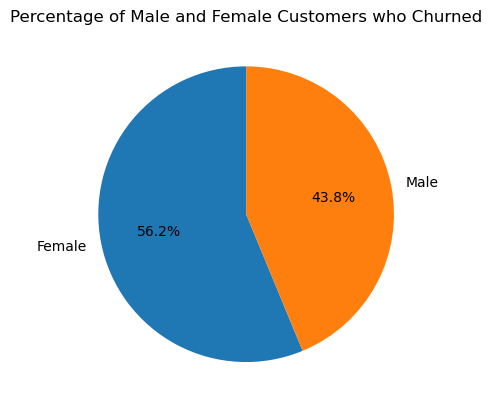

In [2186]:
import matplotlib.pyplot as plt

# Filter the data for customers who churned (Exited = 1)
churned_df = churn_features_df[churn_label_df['Exited'] == 1]

# Group the churned data by 'Gender' and calculate the count for each category
gender_counts = churned_df['Gender'].value_counts()

# Extract the counts and labels for pie chart
gender_labels = gender_counts.index
gender_counts = gender_counts.values

# Create a pie chart
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Percentage of Male and Female Customers who Churned')

# Show the plot
plt.show()

## Feature Scaling

We tried scaling for better accuracy. We tried both Minmax and Standard Scaler, but it didn't have an significant effect. In addition, after scaling, when we need to use Lime or do data visualization, another data set must be created, which causes complexity. Therefore, we leave a way of scaling here to show that we tried scaling, but we won't use it in this code.

In [2187]:
# from sklearn.preprocessing import StandardScaler
# standard = StandardScaler()

# churn_features_scaled_df = churn_features_transformed_df.copy()

# churn_features_scaled_df[
#    ['CreditScore',
#    'Age',
#    'Tenure',
#    'Balance', 
#    'EstimatedSalary']] = standard.fit_transform(churn_features_transformed_df[['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']])


In [2188]:
# from sklearn.preprocessing import MinMaxScaler

# # Create an instance of MinMaxScaler
# minmax = MinMaxScaler()

# # Specify the columns to be scaled
# columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# # Apply MinMaxScaler to the selected columns
# churn_features_scaled_df[columns_to_scale] = minmax.fit_transform(churn_features_scaled_df[columns_to_scale])


In [2189]:
# churn_features_scaled_df.head()

## Model Training and Selection

We are going to try Logistic Classifier, MLP Classifier, Decision Tree Classifier, Gradient Boosting Classifier, Random Forest Classifier. Firstly, we are going to train all of them. Then, we are going to check the accuracy of them so that we can choose one model. 

### Training various classifiers

In [2190]:
# Now let's define our models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=50000)
dt_classifier = DecisionTreeClassifier()
grad_boost = GradientBoostingClassifier()
random_forest = RandomForestClassifier()


# train our models
lr_classifier.fit(churn_features_transformed_df.to_numpy(), churn_label_df.to_numpy().ravel())
mlp_classifier.fit(churn_features_transformed_df.to_numpy(), churn_label_df.to_numpy().ravel())
dt_classifier.fit(churn_features_transformed_df.to_numpy(), churn_label_df.to_numpy().ravel())
grad_boost.fit(churn_features_transformed_df.to_numpy(), churn_label_df.to_numpy().ravel())
random_forest.fit(churn_features_transformed_df.to_numpy(), churn_label_df.to_numpy().ravel())

/Users/jin/opt/anaconda3/envs/i310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomForestClassifier()

###  Evaluating our models' performance

We randomly selected about 500 rows to evaluate the performance of the model, which is test.csv file. Based on the result, the best model is Random Forest Classifier. 

In [2191]:
from sklearn.metrics import accuracy_score

# Load the test dataset
test_df = pd.read_csv("test.csv")

# Drop unnecessary columns
test_df.drop(["RowNumber", "CustomerId", "Surname", "Geography"], axis=1, inplace=True)

# Perform one-hot encoding on "Gender" feature
test_df = pd.get_dummies(test_df, columns=["Gender"])

# Extract the input features and actual labels
test_inputs = test_df.drop("Exited", axis=1)
y_actual = test_df["Exited"]

test_inputs.head()

# Predict using Logistic Regression Classifier
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr, y_actual)

# Predict using MLP Classifier
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp, y_actual)

# Predict using Decision Tree Classifier
y_predicted_dt = dt_classifier.predict(test_inputs.to_numpy())
dt_accuracy_score = accuracy_score(y_predicted_dt, y_actual)

# Predict using Gradient Boosting Classifier
y_predicted_grad_boost = grad_boost.predict(test_inputs.to_numpy())
grad_boost_accuracy_score = accuracy_score(y_predicted_grad_boost, y_actual)

# Predict using Random Forest Classifier
y_predicted_random_forest = random_forest.predict(test_inputs.to_numpy())
random_forest_accuracy_score = accuracy_score(y_predicted_random_forest, y_actual)


print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")
print(f"Accuracy of the Decision Tree Classifier = {dt_accuracy_score}")
print(f"Accuracy of the Gradient Boosting Classifier = {grad_boost_accuracy_score}")
print(f"Accuracy of the Random Forest Classifier = {random_forest_accuracy_score}")

Accuracy of the Logistic Classifier = 0.8021978021978022
Accuracy of the MLP Classifier = 0.8211788211788211
Accuracy of the Decision Tree Classifier = 0.7842157842157842
Accuracy of the Gradient Boosting Classifier = 0.8631368631368631
Accuracy of the Random Forest Classifier = 0.8641358641358642


Save the best model which is Random Forest Classifier.

In [2192]:
import pickle

file_to_write = open("churn_best_model.saved","wb")
pickle.dump(random_forest,file_to_write)
file_to_write.close()

Predict for a single instance using the trained model

In [2193]:
import pickle
import numpy as np

# Load the trained model
model_file = open("churn_best_model.saved", "rb")
random_forest = pickle.load(model_file)
model_file.close()

# Prepare a sample input
CreditScore = 668
Gender = "Male"
Age = 47
Tenure = 7
Balance = 106854.21
NumOfProducts = 1
HasCrCard = 0
IsActiveMember = 1
EstimatedSalary = 157959.02

# Perform one-hot encoding for the "Gender" feature
gender_transformed = {"Female": [1, 0], "Male": [0, 1]}  # Update with the mapping used during training
Gender = gender_transformed[Gender]

# Create a numpy array of the input data, including the one-hot encoded "Gender" feature
input_data = np.array([[CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary] + Gender])

# Predict using the trained decision tree classifier
y_predicted = random_forest.predict(input_data)

# Interpret the prediction result
if y_predicted[0] == 1:
    print("The person is likely to churn")
elif y_predicted[0] == 0:
    print("The person is not likely to churn")
else:
    print("Invalid prediction")


The person is likely to churn


### Explaining a trained model's predictions using LIME

In [2194]:
try:
    import lime
except:
    !pip install lime
    import lime

In [2195]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=churn_features_transformed_df.to_numpy(),
    feature_names=churn_features_transformed_df.columns,
    class_names=[0, 1],
    mode='classification'
)

This is the same instance from the above code, and in the our original data, it says the customer is a churn customer. Also, the graphs looks like working well. By adjusting some of the values from the instance, we could find out a lot of things. Age, If active member or not, number of products, and tenure had significant impact on the result. Also, there were difference between Male and Female as well, showing that Female is more likely to leave the bank in the graph ( we will do further investigation for this). What was different from our expectations was that the impact of credit scores, balance, and salary was smaller than expected.

In [2196]:
import numpy as np
from lime import lime_tabular

CreditScore = 668
Gender = "Male"
Age = 47
Tenure = 7
Balance = 106854.21
NumOfProducts = 1
HasCrCard = 0
IsActiveMember = 1
EstimatedSalary = 157959.02

# Perform one-hot encoding for the "Gender" feature
gender_transformed = {"Female": [1, 0], "Male": [0, 1]}  # Update with the mapping used during training
Gender = gender_transformed[Gender]

input_data = np.array([CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary] +Gender)


exp = explainer.explain_instance(
    data_row=input_data, 
    predict_fn=random_forest.predict_proba
)

exp.show_in_notebook(show_table=True)


## Model Bias and Fairness

The results show that the for both genders, the model suffers from low-accuracy for class 1, but the accuracy drops by 10% for males. This might be a indicator that there may be a bias in this model. However, further investigation is needed because we cannot simply be sure that this model is biased only with this data.

In [2197]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score

# Load the test dataset
test_df = pd.read_csv("test.csv")

# Drop unnecessary columns
test_df.drop(["RowNumber", "CustomerId", "Surname", "Geography"], axis=1, inplace=True)

# Perform one-hot encoding on "Gender" feature
test_df = pd.get_dummies(test_df, columns=["Gender"])

# Extract the input features and actual labels
X_test = test_df.drop("Exited", axis=1)
y_actual = test_df["Exited"]

# Load the saved model
model_file = open("churn_best_model.saved", "rb")
model = pickle.load(model_file)

# Predict using the saved model
y_predicted_random_forest = model.predict(X_test)

# First, let's extract indices of examples for each gender
gender_column = test_df["Gender_Male"]

male_indices = []
female_indices = []

for i in range(len(gender_column)):
    if gender_column[i] == 1:
        male_indices.append(i)
    else:
        female_indices.append(i)

y_actual_male = [y_actual.iloc[i] for i in male_indices]
y_predicted_male = [y_predicted_random_forest[i] for i in male_indices]

y_actual_female = [y_actual.iloc[i] for i in female_indices]
y_predicted_female = [y_predicted_random_forest[i] for i in female_indices]

def class_wise_acc(y_actual, y_predicted):
    total_p = 0
    total_n = 0
    TP = 0
    TN = 0
    for i in range(len(y_predicted)):
        if y_actual[i] == 1:
            total_p += 1
            if y_actual[i] == y_predicted[i]:
                TP += 1
        if y_actual[i] == 0:
            total_n += 1
            if y_actual[i] == y_predicted[i]:
                TN += 1
    return (TP / total_p, TN / total_n)

class_1_acc_male, class_0_acc_male = class_wise_acc(y_actual_male, y_predicted_male)
class_1_acc_female, class_0_acc_female = class_wise_acc(y_actual_female, y_predicted_female)

print(f"Class 1 (i.e., Churn) accuracy for Male = {class_1_acc_male}")
print(f"Class 0 (i.e., Not Churn) accuracy for Male = {class_0_acc_male}")
print(f"Class 1 (i.e., Churn) accuracy for Female = {class_1_acc_female}")
print(f"Class 0 (i.e., Not Churn) accuracy for Female = {class_0_acc_female}")

Class 1 (i.e., Churn) accuracy for Male = 0.36470588235294116
Class 0 (i.e., Not Churn) accuracy for Male = 0.9705263157894737
Class 1 (i.e., Churn) accuracy for Female = 0.4574468085106383
Class 0 (i.e., Not Churn) accuracy for Female = 0.9510086455331412


/Users/jin/opt/anaconda3/envs/i310/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## DEMO

In [2201]:
import ipywidgets as widgets
from IPython.display import display

# Define input widgets
credit_score = widgets.IntSlider(min=300, max=850, description="Credit Score")
age = widgets.IntSlider(min=18, max=100, description="Age")
tenure = widgets.IntSlider(min=0, max=10, description="Tenure")
balance = widgets.FloatSlider(min=0, max=250000, description="Balance")
num_of_products = widgets.IntSlider(min=1, max=4, description="NumOfProducts")
has_cr_card = widgets.Checkbox(value=True, description="Has Credit Card")
is_active_member = widgets.Checkbox(value=True, description="Is Active Member")
estimated_salary = widgets.FloatSlider(min=0, max=200000, description="Est. Salary")
gender = widgets.Dropdown(options=["Male", "Female"], description="Gender")

# Define a button to trigger the prediction
predict_button = widgets.Button(description="Predict Churn")

# Function to handle the button click event
def on_button_click(button):
    # one-hot encoding for the "Gender" feature
    gender_transformed = {"Female": [1, 0], "Male": [0, 1]} 
    Gender = gender_transformed[gender.value]
    
    # Preprocess the input data
    user_input = [[
        credit_score.value,
        Gender[0],
        Gender[1],
        age.value,
        tenure.value,
        balance.value,
        num_of_products.value,
        int(has_cr_card.value),
        int(is_active_member.value),
        estimated_salary.value
    ]]
    
    user_input_df = pd.DataFrame(user_input, columns=["CreditScore", "Female", "Male", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
    
    # Make the prediction
    prediction = random_forest.predict(user_input_df)
    
    # Display the result
    if prediction[0] == 1:
        print("The customer is likely to churn.")
    else:
        print("The customer is not likely to churn.")

# Assign the button click event handler
predict_button.on_click(on_button_click)

# Display the input widgets and the button
display(credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary, gender, predict_button)


IntSlider(value=300, description='Credit Score', max=850, min=300)

IntSlider(value=18, description='Age', min=18)

IntSlider(value=0, description='Tenure', max=10)

FloatSlider(value=0.0, description='Balance', max=250000.0)

IntSlider(value=1, description='NumOfProducts', max=4, min=1)

Checkbox(value=True, description='Has Credit Card')

Checkbox(value=True, description='Is Active Member')

FloatSlider(value=0.0, description='Est. Salary', max=200000.0)

Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

Button(description='Predict Churn', style=ButtonStyle())